In [69]:

import pandas as pd

df = pd.read_csv("Synthetic_Loan_Default_Dataset.csv")
print(df.head())


       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  LN00000001   59   46927       93462          681             256   
1  LN00000002   49  136619       21763          670             300   
2  LN00000003   35   27684      123242          320              25   
3  LN00000004   63  195558      113863          328             339   
4  LN00000005   28   60172       91297          769              29   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... FamilySize  \
0              10         13.59      48.0      0.30  ...        5.0   
1               7         20.71      24.0      0.24  ...        8.0   
2              12         21.03      12.0      0.82  ...        6.0   
3               8          3.54      60.0      0.81  ...        9.0   
4              10         13.30      60.0      0.63  ...        8.0   

  DependentsCount PropertyType EmployerIndustry VehicleOwned  \
0             1.0    Apartment       Healthcare           No   
1             2.0 

In [70]:
df.EmploymentType.unique()

array(['Part-time', 'Full-time', 'Unemployed', 'Self-employed', nan],
      dtype=object)

In [71]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'ResidenceType', 'BankAccountType', 'PrevDefaults', 'MissedPayments',
       'LoanApplicationChannel', 'Region', 'MobileVerified', 'EmailVerified',
       'AccountAgeMonths', 'IsGovernmentEmployee', 'HasCreditCard',
       'CreditCardLimit', 'CreditUtilization', 'FamilySize', 'DependentsCount',
       'PropertyType', 'EmployerIndustry', 'VehicleOwned',
       'HomeOwnershipDuration', 'RiskScore', 'CurrentDelinquencies',
       'TotalAccounts', 'Default'],
      dtype='object')

In [72]:
df['Default'].value_counts(normalize=True)

!python --version

!pip install imbalanced-learn

Python 3.11.13


In [73]:
import random
random.seed(42)
df['LoanID'] = range(1, len(df) + 1)
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,FamilySize,DependentsCount,PropertyType,EmployerIndustry,VehicleOwned,HomeOwnershipDuration,RiskScore,CurrentDelinquencies,TotalAccounts,Default
0,1,59,46927,93462,681,256,10,13.59,48.0,0.30,...,5.0,1.0,Apartment,Healthcare,No,7.0,0.87,0.0,10.0,1.0
1,2,49,136619,21763,670,300,7,20.71,24.0,0.24,...,8.0,2.0,Villa,Others,No,9.0,0.68,4.0,19.0,0.0
2,3,35,27684,123242,320,25,12,21.03,12.0,0.82,...,6.0,0.0,Villa,Healthcare,No,39.0,0.13,0.0,18.0,0.0
3,4,63,195558,113863,328,339,8,3.54,60.0,0.81,...,9.0,0.0,Villa,Education,No,14.0,0.23,4.0,7.0,0.0
4,5,28,60172,91297,769,29,10,13.30,60.0,0.63,...,8.0,3.0,Villa,Finance,Yes,25.0,0.06,2.0,17.0,0.0


In [74]:
df.Education.unique()

df_ohe = pd.get_dummies(df)

df_ohe.head()

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,FamilySize,DependentsCount,PropertyType,EmployerIndustry,VehicleOwned,HomeOwnershipDuration,RiskScore,CurrentDelinquencies,TotalAccounts,Default
0,1,59,46927,93462,681,256,10,13.59,48.0,0.30,...,5.0,1.0,Apartment,Healthcare,No,7.0,0.87,0.0,10.0,1.0
1,2,49,136619,21763,670,300,7,20.71,24.0,0.24,...,8.0,2.0,Villa,Others,No,9.0,0.68,4.0,19.0,0.0
2,3,35,27684,123242,320,25,12,21.03,12.0,0.82,...,6.0,0.0,Villa,Healthcare,No,39.0,0.13,0.0,18.0,0.0
3,4,63,195558,113863,328,339,8,3.54,60.0,0.81,...,9.0,0.0,Villa,Education,No,14.0,0.23,4.0,7.0,0.0
4,5,28,60172,91297,769,29,10,13.30,60.0,0.63,...,8.0,3.0,Villa,Finance,Yes,25.0,0.06,2.0,17.0,0.0


In [ ]:


# Remove rows where 'Default' is NaN
df_ohe_clean = df_ohe.dropna(subset=['Default'])

# Reassign X and Y from the cleaned DataFrame
X = df_ohe_clean.drop(columns=['Default'])
Y = df_ohe_clean['Default']

In [ ]:
"""# **Balancing Data**"""

# Step 2: Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [77]:

# Step 3: Combine resampled features and target variable into a new DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["Default"] = y_resampled

resampled_df.to_csv('Processed_data.csv', index=False)

resampled_df.head()

resampled_df['Default'].value_counts(normalize=True)
resampled_df.shape

(163616, 73)

In [114]:
"""# **Feature Reduction**"""

# Ensure resampled_df exists and is the correct dataframe after SMOTE
# If resampled_df is not available, load it from 'Processed_data.csv'
try:
    resampled_df.head()
except NameError:
    resampled_df = pd.read_csv('Processed_data.csv')


X = resampled_df[['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']]
Y= resampled_df['Default']

X.shape,Y.shape

((163616, 8), (163616,))

In [79]:
# Step 3: Combine resampled features and target variable into a new DataFrame
final_df = pd.DataFrame(X, columns=X.columns)
final_df["Default"] = Y

final_df.head()

final_df.shape

final_df.to_csv('Selected_features.csv', index=False)
final_df.shape

(163616, 9)

In [80]:
"""Feature_Importance.ipynb

"""

import pandas as pd
import numpy as np
import random

In [81]:
df = pd.read_csv('Synthetic_Loan_Default_Dataset.csv')
df.head()

df['LoanID'].nunique()

102200

In [82]:
df.shape

df['LoanID'] = range(1, len(df) + 1)

df.head()

df['LoanID'].nunique()

df['Education'].replace(["Bachelor's", "Master's", 'High School', 'PhD'],[1,2,0,3])

df['Education'].unique()

df.isnull().sum()

/tmp/ipython-input-82-2222917111.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'].replace(["Bachelor's", "Master's", 'High School', 'PhD'],[1,2,0,3])


,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,1
DTIRatio,1


In [83]:
#df.drop('LoanID',axis=1,inplace=True)

df_ohe = pd.get_dummies(df)
df_ohe.head()

df_ohe.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'PrevDefaults', 'MissedPayments', 'AccountAgeMonths',
       'CreditCardLimit', 'CreditUtilization', 'FamilySize', 'DependentsCount',
       'HomeOwnershipDuration', 'RiskScore', 'CurrentDelinquencies',
       'TotalAccounts', 'Default', 'Education_Bachelor's',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes',
       'ResidenceType_Mortgaged', 'ResidenceType

In [84]:


# Remove rows where 'Default' is NaN
df_ohe_clean = df_ohe.dropna(subset=['Default'])

# Reassign X and Y from the cleaned DataFrame
X = df_ohe_clean.drop(columns=['Default'],axis=1)
Y = df_ohe_clean['Default']


In [115]:
"""# TrainTest Split"""

from sklearn.model_selection import train_test_split

# Use the X and Y from the balanced and feature-selected data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7,stratify = Y)

X_train.head()

X_train.isnull().sum()

"""# **Getting Feature importance**

# APPLY DECISION TREE
"""

'# **Getting Feature importance**\n\n# APPLY DECISION TREE\n'

In [86]:
from pyspark.sql import SparkSession

# Create Spark session if not already created
spark = SparkSession.builder.appName("Oversampling").getOrCreate()

# Reload your data as a Spark DataFrame
file_path = "/content/Synthetic_Loan_Default_Dataset.csv"  # Replace with actual path
df = spark.read.csv(file_path, header=True, inferSchema=True)


In [119]:
# Count class distribution
major_df = df.filter(df.Default == 0)
minor_df = df.filter(df.Default == 1)

# Oversample minority class
ratio = int(major_df.count() / minor_df.count())
oversampled_minority = minor_df
for _ in range(ratio - 1):
    oversampled_minority = oversampled_minority.union(minor_df)

# Combine
balanced_df = major_df.union(oversampled_minority)


In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 7)
dt.fit(X_train,y_train)

# importance of all features
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)

# 2) mean importance take col > mean import
mean_imp = sum(dt.feature_importances_)/len(dt.feature_importances_)
X_train.columns[dt.feature_importances_ > mean_imp ]

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'MissedPayments', 'AccountAgeMonths', 'CreditCardLimit',
       'CreditUtilization', 'FamilySize', 'HomeOwnershipDuration', 'RiskScore',
       'TotalAccounts'],
      dtype='object')

In [89]:
# 3) Select top 5
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)[:5]

"""# APPLY RFE"""

from sklearn.feature_selection import RFE

rfe = RFE(dt)
rfe.fit(X_train, y_train)

for imp,col in sorted(zip(rfe.ranking_,X_train.columns)):
    print(f"{col} = {imp}")

#2) important column rank = 1

print("Column Count = ",len(X_train.columns[rfe.ranking_ == 1  ]))
X_train.columns[rfe.ranking_ == 1 ]

AccountAgeMonths = 1
Age = 1
BankAccountType_Current = 1
CreditCardLimit = 1
CreditScore = 1
CreditUtilization = 1
CurrentDelinquencies = 1
DTIRatio = 1
DependentsCount = 1
EmploymentType_Full-time = 1
EmploymentType_Part-time = 1
FamilySize = 1
HasCoSigner_Yes = 1
HasCreditCard_No = 1
HasDependents_No = 1
HomeOwnershipDuration = 1
Income = 1
InterestRate = 1
LoanAmount = 1
LoanApplicationChannel_Agent = 1
LoanID = 1
LoanTerm = 1
MaritalStatus_Divorced = 1
MaritalStatus_Single = 1
MissedPayments = 1
MonthsEmployed = 1
NumCreditLines = 1
PrevDefaults = 1
PropertyType_Plot = 1
Region_Rural = 1
Region_Semi-Urban = 1
ResidenceType_Mortgaged = 1
ResidenceType_Rented = 1
RiskScore = 1
TotalAccounts = 1
VehicleOwned_No = 1
EmploymentType_Self-employed = 2
EmployerIndustry_IT = 3
MobileVerified_No = 4
MaritalStatus_Married = 5
HasMortgage_Yes = 6
LoanPurpose_Business = 7
LoanApplicationChannel_Online = 8
EmployerIndustry_Others = 9
EmailVerified_No = 10
PropertyType_Villa = 11
Education_Master

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'PrevDefaults', 'MissedPayments', 'AccountAgeMonths',
       'CreditCardLimit', 'CreditUtilization', 'FamilySize', 'DependentsCount',
       'HomeOwnershipDuration', 'RiskScore', 'CurrentDelinquencies',
       'TotalAccounts', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'MaritalStatus_Divorced', 'MaritalStatus_Single', 'HasDependents_No',
       'HasCoSigner_Yes', 'ResidenceType_Mortgaged', 'ResidenceType_Rented',
       'BankAccountType_Current', 'LoanApplicationChannel_Agent',
       'Region_Rural', 'Region_Semi-Urban', 'HasCreditCard_No',
       'PropertyType_Plot', 'VehicleOwned_No'],
      dtype='object')

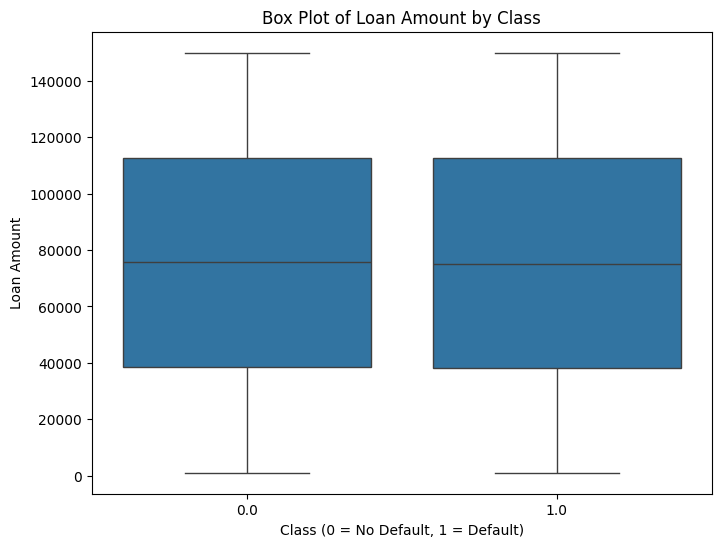

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert relevant Spark DataFrame columns to pandas Series
default_pandas = df.select("Default").toPandas()["Default"]
loan_amount_pandas = df.select("LoanAmount").toPandas()["LoanAmount"]


plt.figure(figsize=(8, 6))
sns.boxplot(x=default_pandas, y=loan_amount_pandas)
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

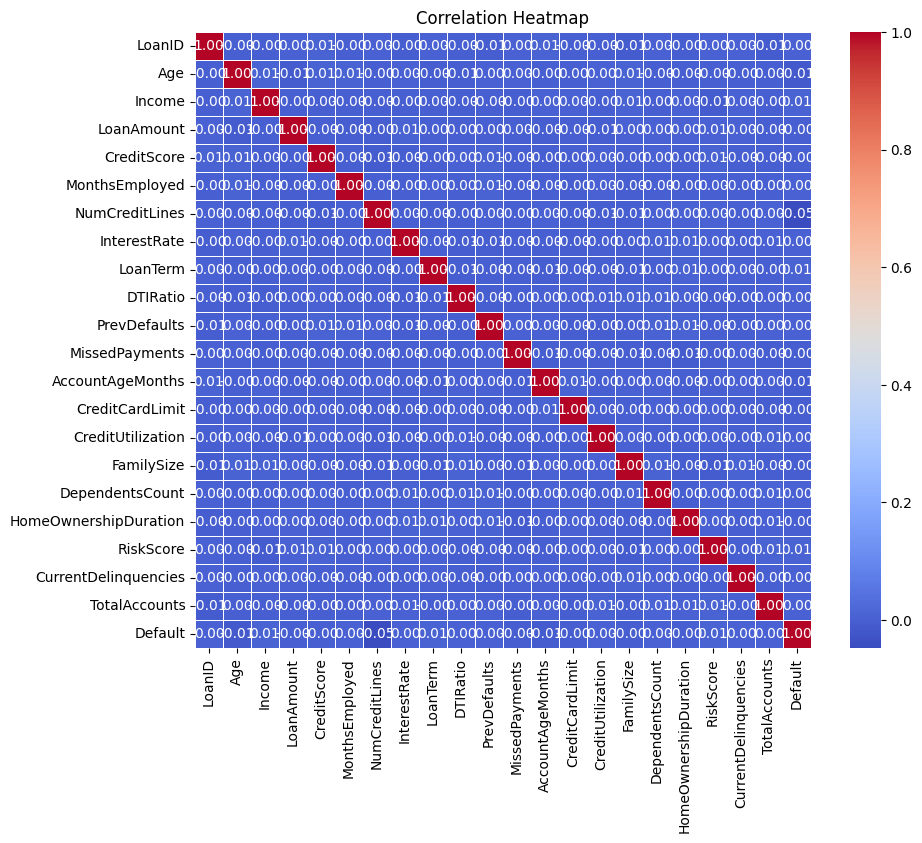

X_train shape: (130892, 8)
X_test shape: (32724, 8)
Y_train shape: (130892,)
Y_test shape: (32724,)


In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Convert Spark DataFrame to pandas
df_pandas = df.toPandas()

# Step 2: Drop rows with NaNs and select numeric columns
numeric_df = df_pandas.select_dtypes(include=['number']).dropna()

# Step 3: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Define X and Y
X = numeric_df[['Age', 'Income', 'LoanAmount', 'CreditScore',
                'MonthsEmployed', 'InterestRate', 'DTIRatio', 'LoanTerm']]
Y = numeric_df['Default']

# Step 5: Train-test split (fix starts here)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Step 6: Show shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


In [122]:
"""# **Model Training Using SVM**"""

#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

file_path ="/content/Selected_features.csv"

In [124]:
# Create an DataFrame from file_path
df = spark.read.csv(file_path,header=True,inferSchema=True)

# Check the type of people_df
#print("The type of people_df is", type(people_df))

from pyspark.sql.functions import col
# Get the total count of records
total_count = df.count()

# Get the count of each class (0 and 1)
class_counts = df.groupBy("Default").count()
class_counts

DataFrame[Default: double, count: bigint]

In [125]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Step 1: Create Spark session
spark = SparkSession.builder \
    .appName("DefaultAnalysis") \
    .getOrCreate()

# Step 2: Load CSV into DataFrame
file_path = "/content/Processed_data.csv"  # Replace with your actual file path
df = spark.read.csv(file_path , header=True, inferSchema=True)

# Step 3: Print the DataFrame schema (optional)
df.printSchema()

# Step 4: Get total number of records
total_count = df.count()
print(f"Total number of records: {total_count}")

# Step 5: Get count of each class in 'Default' column
class_counts = df.groupBy("Default").count()
print("Class counts:")
class_counts.show()

# Step 6: Show percentage distribution of each class
class_distribution = class_counts.withColumn(
    "Percentage", (col("count") / total_count) * 100
)
print("Class distribution (with percentages):")
class_distribution.show()


root
 |-- LoanID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- MonthsEmployed: integer (nullable = true)
 |-- NumCreditLines: integer (nullable = true)
 |-- InterestRate: double (nullable = true)
 |-- LoanTerm: double (nullable = true)
 |-- DTIRatio: double (nullable = true)
 |-- PrevDefaults: double (nullable = true)
 |-- MissedPayments: double (nullable = true)
 |-- AccountAgeMonths: double (nullable = true)
 |-- CreditCardLimit: double (nullable = true)
 |-- CreditUtilization: double (nullable = true)
 |-- FamilySize: double (nullable = true)
 |-- DependentsCount: double (nullable = true)
 |-- HomeOwnershipDuration: double (nullable = true)
 |-- RiskScore: double (nullable = true)
 |-- CurrentDelinquencies: double (nullable = true)
 |-- TotalAccounts: double (nullable = true)
 |-- Education_Bachelor's: boolean (nullable = true)
 |-- Educ

In [95]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, when

In [126]:
feature_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']
target_col = 'Default'

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(df)

In [128]:
from xgboost import XGBClassifier

# Re-fit the model on the entire training data
model = XGBClassifier(eval_metric='logloss')

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

model.fit(X_train, Y_train)

print(X_train.shape)
print(y_train.shape)


Shape of X_train: (130892, 8)
Shape of y_train: (130892,)
(130892, 8)
(130892,)


In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

# ✅ 1. Assuming you already have a cleaned DataFrame:
# From previous steps:
# X, Y = feature matrix and target
# Make sure you re-split if needed

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# ✅ 2. Train the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight="balanced",  # Helps if classes are slightly imbalanced
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 3. Evaluate the model
predictions = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print("\n🔍 Classification Report:")
print(classification_report(Y_test, predictions))

print("📉 Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print(f"🎯 ROC AUC Score: {roc_auc_score(Y_test, probs):.4f}")

# ✅ 4. Save the model to disk
joblib.dump(model, "rf_model_project.pkl")
print("\n✅ Model saved as rf_model_project.pkl")



🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85     16362
         1.0       0.95      0.69      0.80     16362

    accuracy                           0.83     32724
   macro avg       0.85      0.83      0.82     32724
weighted avg       0.85      0.83      0.82     32724

📉 Confusion Matrix:
[[15805   557]
 [ 5095 11267]]
🎯 ROC AUC Score: 0.8755

✅ Model saved as rf_model_project.pkl


In [134]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Assuming y_test and predictions (from the scikit-learn model) are available from previous cells

# Evaluate the model using scikit-learn metrics
print("\n🔍 Classification Report:")
print(classification_report(Y_test, predictions))

print("📉 Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

# Calculate ROC AUC Score (requires probabilities)
# Make sure you have predicted probabilities available, e.g., from model.predict_proba(X_test)
# If you don't have probabilities, you might need to re-run the prediction step to get them.
try:
    # Assuming 'probs' variable with predicted probabilities exists from cell 82N8mRiDghlL
    print(f"🎯 ROC AUC Score: {roc_auc_score(Y_test, probs):.4f}")
except NameError:
    print("Predicted probabilities ('probs') not found. Cannot calculate ROC AUC score.")
    print("Please ensure model.predict_proba(X_test) was run and stored in a 'probs' variable.")


🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85     16362
         1.0       0.95      0.69      0.80     16362

    accuracy                           0.83     32724
   macro avg       0.85      0.83      0.82     32724
weighted avg       0.85      0.83      0.82     32724

📉 Confusion Matrix:
[[15805   557]
 [ 5095 11267]]
🎯 ROC AUC Score: 0.8755


In [137]:
import numpy as np
import joblib
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# ✅ Load trained model
model = joblib.load("rf_model.pkl")  # Your trained RandomForestClassifier

# ✅ Define input type: (batch_size, num_features)
initial_type = [('float_input', FloatTensorType([None, 8]))]  # 8 features

# ✅ Convert to ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type)

# ✅ Save the ONNX model
with open("rf_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ Model converted and saved as rf_model.onnx")


✅ Model converted and saved as rf_model.onnx


In [140]:
df.groupBy("Default").count().show()

+-------+-----+
|Default|count|
+-------+-----+
|    0.0|81808|
|    1.0|81808|
+-------+-----+



In [142]:
y_pred = model.predict(X_test)

# Save test labels and predictions
joblib.dump(y_test, "y_test_project.pkl")
joblib.dump(y_pred, "y_pred_project.pkl")

['y_pred_project.pkl']